In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('defend_tournaments_atp_top_10.csv', header=-1)
df1 = pd.read_csv('defend_tournaments_wta_top_10.csv', header=-1)
df3= pd.read_csv('total_titles_wta.csv', header=-1)
df4= pd.read_csv('total_titles_atp.csv', header=-1)


In [454]:
df.columns = ['Name', 'Defends']
df

,Name,Defends
0,Roger Federer,34
1,Jimmy Connors,27
2,Rafael Nadal,26
3,Novak Djokovic,24
4,John Mcenroe,23
5,Bjorn Borg,19
6,Pete Sampras,17
7,Ivan Lendl,14
8,Thomas Muster,12
9,Ilie Nastase,12


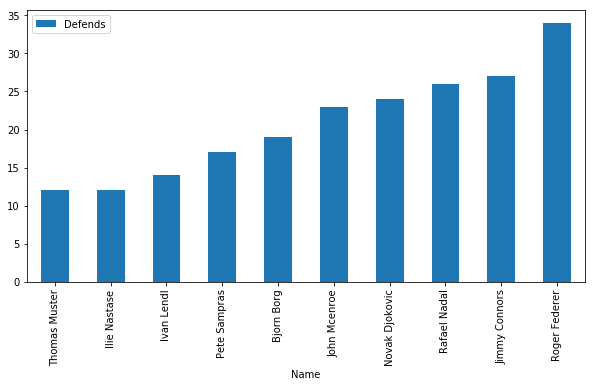

In [455]:
df = df.sort_values('Defends')
df.plot(kind='bar', x='Name', figsize=(10,5))
plt.show()


In [456]:
df1.columns = ['Name', 'Defends']
df1

,Name,Defends
0,Martina Navratilova,53
1,Steffi Graf,44
2,Chris Evert,24
3,Serena Williams,18
4,Monica Seles,17
5,Venus Williams,12
6,Lindsay Davenport,11
7,Kim Clijsters,8
8,Tracy Austin,7
9,Justine Henin,7


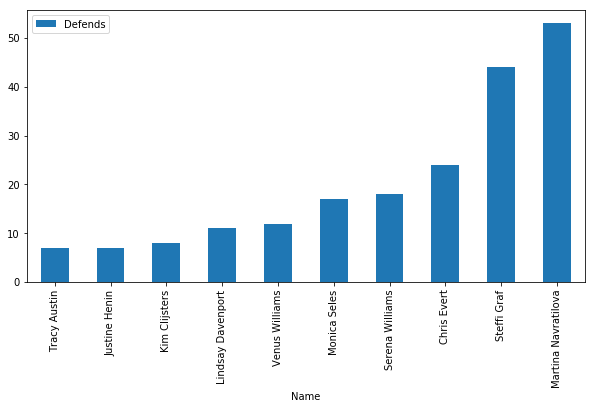

In [457]:
df1 = df1.sort_values('Defends')
df1.plot(kind='bar', x='Name', figsize=(10,5))
plt.show()

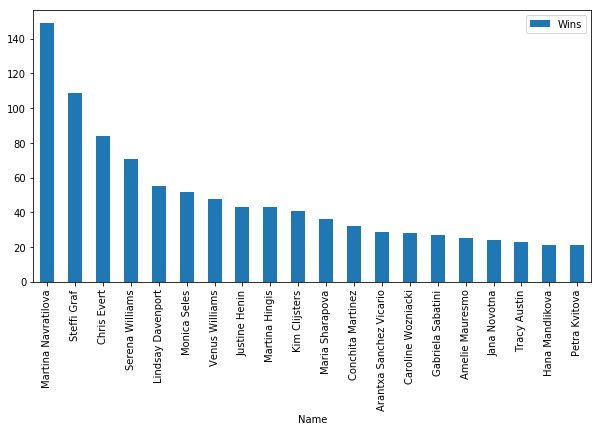

In [458]:
df3.columns = ['Name', 'Wins']
df3 = df3[:20]
df3.plot(kind='bar', x='Name', figsize=(10,5))
plt.show()


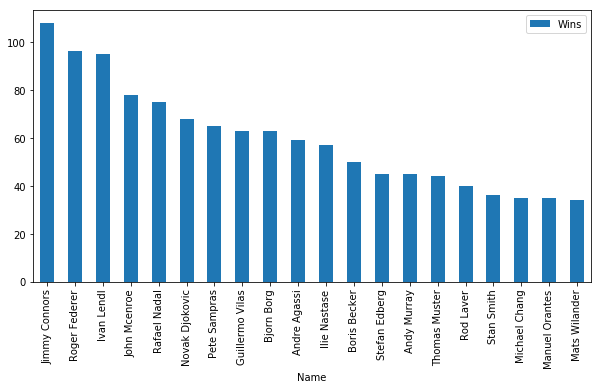

In [459]:
df4.columns = ['Name', 'Wins']
df4 = df4[:20]
df4.plot(kind='bar', x='Name', figsize=(10,5))
plt.show()

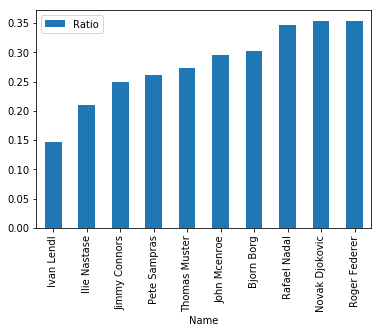

In [474]:
import pandas as pd
df4.columns = ['Name', 'Wins']
df.columns = ['Name', 'Defends']

df_temp = pd.merge(df, df4, on="Name")
df_temp['Ratio'] = df_temp['Defends']/df_temp['Wins']
df_temp.sort_values(by=['Ratio'], inplace=True)
df_temp.plot(x="Name", y="Ratio", kind="bar")
plt.show()

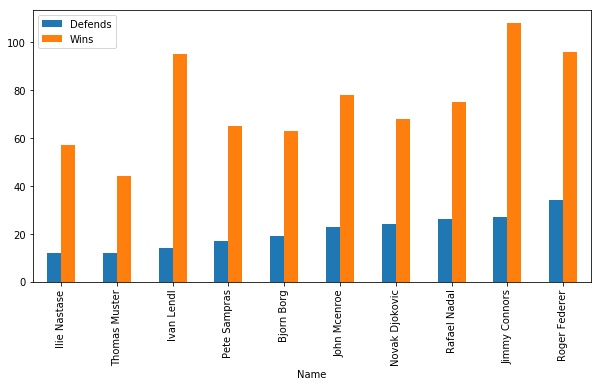

In [475]:
del df_temp['Ratio']
df_temp.sort_values(by=['Defends'], inplace=True)
df_temp.plot.bar(x="Name",figsize=(10,5))
plt.show()

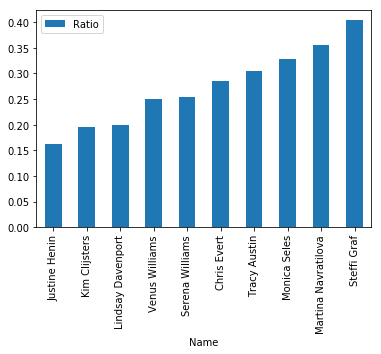

In [476]:
import pandas as pd
df3.columns = ['Name', 'Wins']
df1.columns = ['Name', 'Defends']

df_temp1 = pd.merge(df3, df1, on="Name")
df_temp1['Ratio'] = df_temp1['Defends']/df_temp1['Wins']
df_temp1.sort_values(by=['Ratio'], inplace=True)
df_temp1.plot(x="Name", y="Ratio", kind="bar")
plt.show()

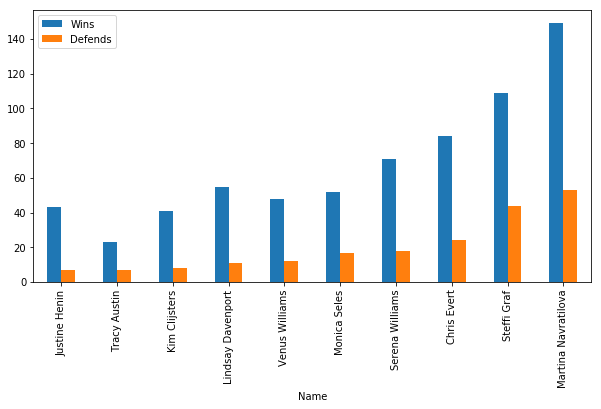

In [477]:
del df_temp1['Ratio']
df_temp1.sort_values(by=['Defends'], inplace=True)
df_temp1.plot.bar(x="Name",figsize=(10,5))
plt.show()

#  Data Pre-processing, Feature Extraction & Decesion Tree algorithm 

In [968]:
df2= pd.read_csv('atp-combined.csv', header=0)
df2.drop(df2.index[1:10151], inplace=True)
del df2['tourney_id']
del df2['draw_size']
del df2['match_num']
del df2['winner_id']
del df2['winner_entry']
del df2['loser_id']
del df2['loser_entry']
del df2['w_df']
del df2['w_svpt']
del df2['w_1stIn']
del df2['w_2ndWon']
del df2['w_SvGms']
del df2['w_bpSaved']
del df2['l_2ndWon']
del df2['l_bpFaced']
del df2['l_SvGms']
del df2['l_bpSaved']
del df2['l_1stIn']
del df2['l_df']
del df2['l_svpt']
del df2['w_bpFaced']
del df2['minutes']



list(df2)

['tourney_name',
 'surface',
 'tourney_level',
 'tourney_date',
 'winner_seed',
 'winner_name',
 'winner_hand',
 'winner_ht',
 'winner_ioc',
 'winner_age',
 'winner_rank',
 'winner_rank_points',
 'loser_seed',
 'loser_name',
 'loser_hand',
 'loser_ht',
 'loser_ioc',
 'loser_age',
 'loser_rank',
 'loser_rank_points',
 'score',
 'best_of',
 'round',
 'w_ace',
 'w_1stWon',
 'l_ace',
 'l_1stWon']

In [969]:
df2 = df2.dropna(thresh=5)
df2.reset_index(drop=True, inplace=True)
df2['freq'] = df2.groupby('winner_name')['winner_name'].transform('count')
df2.head()

,tourney_name,surface,tourney_level,tourney_date,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,...,loser_rank,loser_rank_points,score,best_of,round,w_ace,w_1stWon,l_ace,l_1stWon,freq
0,Australian Chps.,Grass,G,19680119,NaN,Richard Coulthard,R,NaN,AUS,NaN,...,NaN,NaN,12-10 7-5 4-6 7-5,5,R64,NaN,NaN,NaN,NaN,1
1,London WCT,Hard,A,19730118,NaN,Arthur Ashe,R,185.0,USA,29.527721,...,NaN,NaN,7-6 7-6,3,QF,NaN,NaN,NaN,NaN,409
2,London WCT,Hard,A,19730118,NaN,Marty Riessen,R,185.0,USA,31.123888,...,NaN,NaN,6-2 3-6 6-4,3,QF,NaN,NaN,NaN,NaN,211
3,London WCT,Hard,A,19730118,NaN,Mark Cox,L,NaN,GBR,29.541410,...,NaN,NaN,7-5 0-6 6-4,3,QF,NaN,NaN,NaN,NaN,206
4,London WCT,Hard,A,19730118,NaN,Brian Fairlie,R,NaN,NZL,24.599589,...,NaN,NaN,6-3 6-2,3,SF,NaN,NaN,NaN,NaN,145


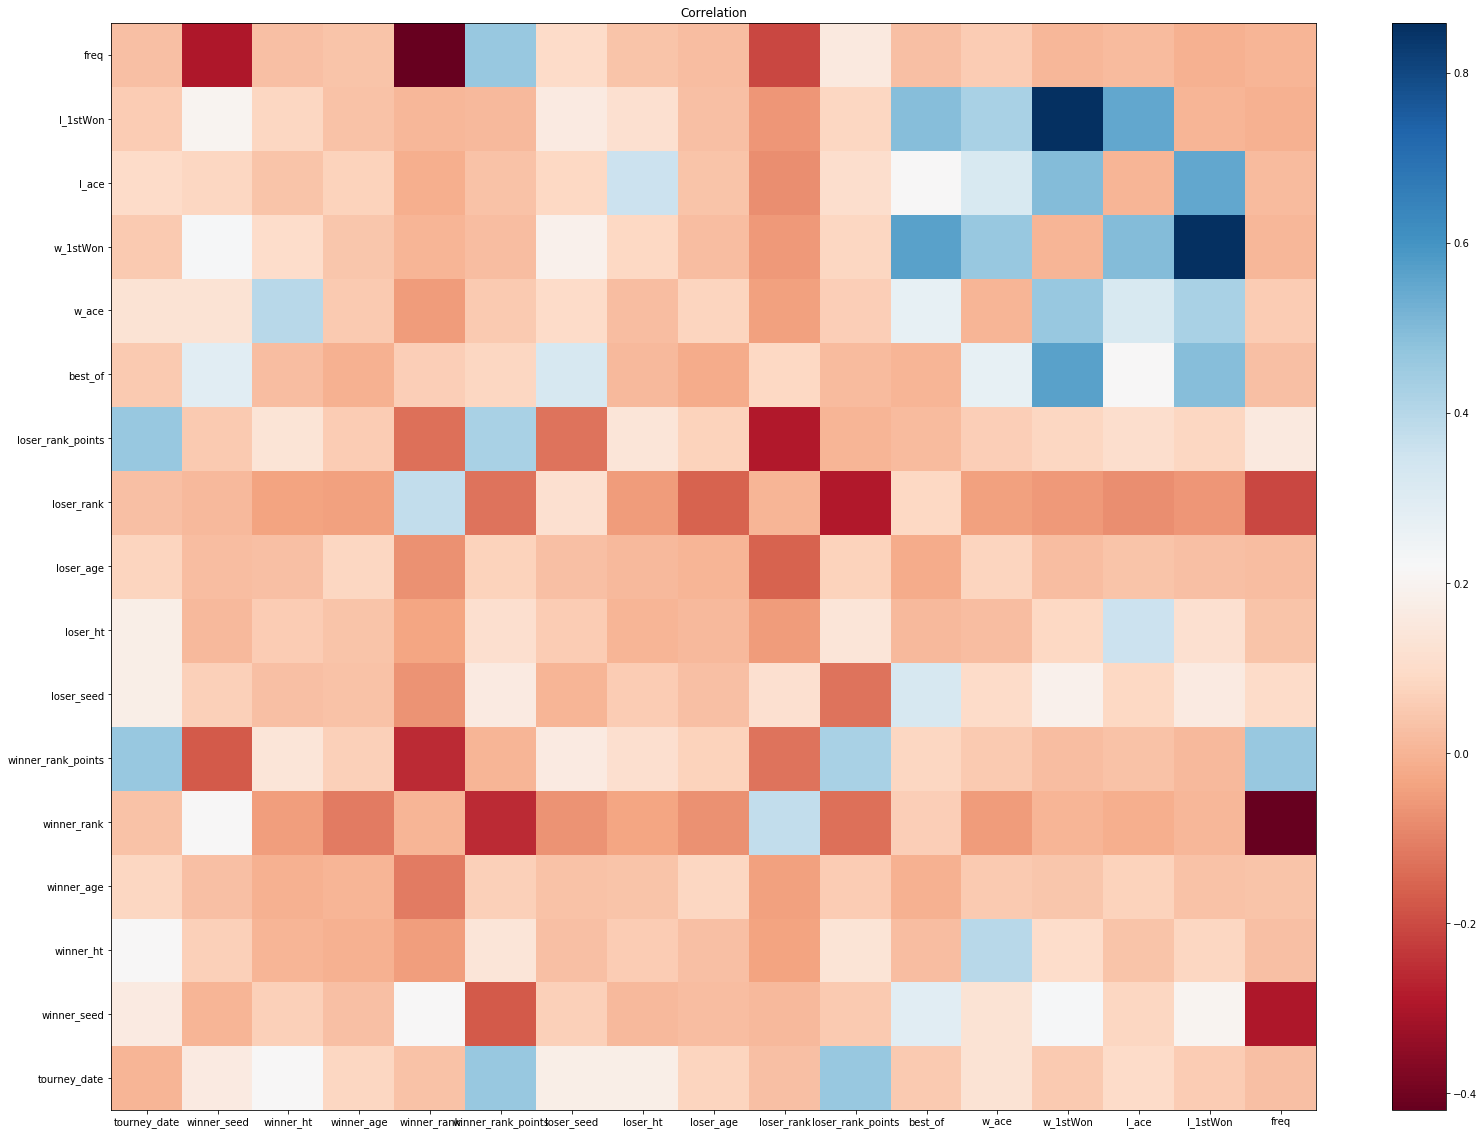

In [970]:
import matplotlib.pyplot as plt
dpro = df2.copy()

c_mat = dpro.corr()
for i in range(c_mat.shape[0]):
    c_mat.iloc[i,i] = 0

fig, ax = plt.subplots()
heatmap = ax.pcolor(c_mat, cmap=plt.cm.RdBu)

#Set the tick labels and center them
ax.set_xticks(np.arange(c_mat.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(c_mat.shape[1])+0.5, minor=False)
ax.set_xticklabels(c_mat.index.values, minor=False)
ax.set_yticklabels(c_mat.index.values, minor=False)

fig.set_size_inches(27, 20, forward=True)
cbar = plt.colorbar(heatmap)
plt.title('Correlation')

plt.show()

In [971]:
dfa = df2[(df2.tourney_date == 20150104).idxmax():]
dfa = dfa.loc[dfa['surface'] == "Clay"]
dfa['count'] = dfa.groupby('winner_name')['winner_name'].transform('count')
dfa = dfa.sort_values(by=['count'],ascending=False).reset_index()

del dfa['index']
del dfa['score']
del dfa['round']
del dfa['tourney_name']
del dfa['surface']
del dfa['tourney_level']

df_ar = dfa

cols = list(dfa.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('winner_name')) #Remove b from list
dfa = dfa[cols+['winner_name']]

dfa['winner_hand'] = pd.factorize(dfa['winner_hand'])[0]
dfa['loser_hand'] = pd.factorize(dfa['loser_hand'])[0]
dfa['winner_name'] = pd.factorize(dfa['winner_name'])[0]
del dfa['loser_name']
del dfa['loser_ioc']
del dfa['winner_ioc']
winners = pd.factorize(dfa['winner_name'])[0]
dfa=dfa.fillna(dfa.median())

dfa.head()

,tourney_date,winner_seed,winner_hand,winner_ht,winner_age,winner_rank,winner_rank_points,loser_seed,loser_hand,loser_ht,...,loser_rank,loser_rank_points,best_of,w_ace,w_1stWon,l_ace,l_1stWon,freq,count,winner_name
0,20160523,4.0,0,185.0,29.971253,5.0,5675.0,6.0,0,185.0,...,100.0,585.0,5,1.0,34.0,10.0,26.0,885,72,0
1,20150216,1.0,0,185.0,28.706366,3.0,5745.0,6.0,0,185.0,...,55.0,841.0,3,4.0,30.0,2.0,36.0,885,72,0
2,20150223,1.0,0,185.0,28.725530,4.0,5425.0,6.0,0,185.0,...,146.0,363.0,3,2.0,23.0,2.0,15.0,885,72,0
3,20150420,2.0,0,185.0,28.878850,4.0,5435.0,6.0,0,183.0,...,123.0,450.0,3,3.0,25.0,2.0,18.0,885,72,0
4,20170515,4.0,0,185.0,30.948665,4.0,5195.0,6.0,0,183.0,...,73.0,703.0,3,2.0,5.0,2.0,8.0,885,72,0


In [972]:
df_t = dfa['winner_name'].value_counts().reset_index()
df_t.columns = ['col', 'count1']
df_t.head()
# len(list(df_t['count1']))

,col,count1
0,0,72
1,1,69
2,2,55
3,3,54
4,5,48


In [973]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

train_df=dfa.sample(frac=0.7,random_state=50)  #Training data
test_df=dfa.drop(train_df.index)               #Testing data

Xdt_train=train_df.iloc[:,0:20]
Ydt_train=train_df['winner_name']                   
Xdt_test=test_df.iloc[:,0:20]
Ydt_test=test_df['winner_name']

clf = tree.DecisionTreeClassifier(criterion="entropy")     #Modelling using Decision Trees
clf = clf.fit(Xdt_train, Ydt_train)
print(clf)

results_dt = clf.predict(Xdt_test)
print("\n" + str(Counter(results_dt)))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Counter({1: 21, 0: 20, 2: 19, 6: 19, 4: 15, 8: 15, 3: 14, 11: 14, 23: 14, 17: 13, 26: 13, 7: 12, 5: 11, 9: 11, 13: 11, 21: 11, 28: 11, 39: 11, 56: 11, 16: 10, 18: 10, 25: 10, 31: 10, 50: 10, 10: 9, 12: 9, 19: 9, 33: 9, 43: 9, 14: 8, 15: 8, 20: 8, 24: 8, 27: 8, 30: 8, 37: 8, 41: 8, 57: 8, 29: 7, 38: 7, 42: 7, 44: 7, 45: 7, 61: 7, 71: 7, 80: 7, 22: 6, 32: 6, 34: 6, 35: 6, 48: 6, 55: 6, 64: 6, 65: 6, 84: 6, 86: 6, 113: 6, 130: 6, 36: 5, 52: 5, 54: 5, 58: 5, 63: 5, 67: 5, 69: 5, 73: 5, 123: 5, 149: 5, 40: 4, 46: 4, 47: 4, 51: 4, 59: 4, 62: 4, 66: 4, 70: 4, 81: 4, 83: 4, 114: 4, 117: 4, 188: 4, 60: 3, 68: 3, 72: 3, 85: 3, 88: 3, 96: 3, 97: 3, 

In [974]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *
clf1 = tree.DecisionTreeClassifier(criterion="entropy")   #Training using Decision Tree Algorithm
clf1 = clf1.fit(Xdt_train, Ydt_train)
results_dt1 = clf1.predict(Xdt_test)
print("Accuracy Score for Test Data: ", (accuracy_score(Ydt_test,results_dt1)))   #Accuracy 
print("Precision Score for Test Data: ", (precision_score(Ydt_test,results_dt1,average='macro' )))  #Precision
print("Recall Score for Test Data: ", (recall_score(Ydt_test,results_dt1,average='macro' )))        #Recall
print("F1 Score for Test Data: ", (f1_score(Ydt_test,results_dt1,average='macro' )))     

print(len(clf.feature_importances_))


('Accuracy Score for Test Data: ', 0.91809290953545231)
('Precision Score for Test Data: ', 0.63965713472755725)
('Recall Score for Test Data: ', 0.66180415828303152)
('F1 Score for Test Data: ', 0.64135926671137933)
20


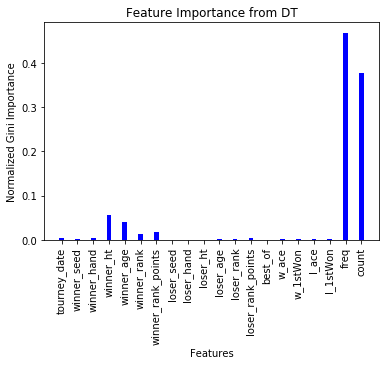

In [975]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
width=0.30
ax.bar(np.arange(20), clf.feature_importances_, width, color='b')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train_df.drop('winner_name',1).columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_xlabel('Features')
ax.set_ylabel('Normalized Gini Importance')
plt.show()

In [976]:
del dfa['w_1stWon']
del dfa['w_ace']
del dfa['best_of']
del dfa['loser_rank_points']
del dfa['loser_rank']
del dfa['loser_ht']
del dfa['tourney_date']
del dfa['loser_seed']
del dfa['l_1stWon']


list(dfa)

['winner_seed',
 'winner_hand',
 'winner_ht',
 'winner_age',
 'winner_rank',
 'winner_rank_points',
 'loser_hand',
 'loser_age',
 'l_ace',
 'freq',
 'count',
 'winner_name']

In [977]:
import warnings
warnings.filterwarnings('ignore')

train_df=dfa.sample(frac=0.8,random_state=50)     #Train data
test_df=dfa.drop(train_df.index)                  #Test data

Xdt_train=train_df.iloc[:,0:11]              #Predictors
Ydt_train=train_df['winner_name']                #Target variable      
Xdt_test=test_df.iloc[:,0:11]
Ydt_test=test_df['winner_name']
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xdt_train, Ydt_train)
results_dt = clf.predict(Xdt_test)

print("Accuracy Score for Test Data:", (accuracy_score(Ydt_test,results_dt)))
print("Precision Score for Test Data: ", (precision_score(Ydt_test,results_dt,average='macro' )))
print("Recall Score for Test Data: ", (recall_score(Ydt_test,results_dt,average='macro' )))
print("F1 Score for Test Data: ", (f1_score(Ydt_test,results_dt,average='macro' )))

print("\n" + str(Counter(results_dt)))

('Accuracy Score for Test Data:', 0.94505494505494503)
('Precision Score for Test Data: ', 0.7423423423423422)
('Recall Score for Test Data: ', 0.7567567567567568)
('F1 Score for Test Data: ', 0.74576576576576581)

Counter({0: 14, 6: 14, 1: 13, 2: 10, 3: 10, 4: 10, 7: 10, 8: 10, 17: 10, 23: 10, 26: 10, 11: 8, 21: 8, 28: 8, 31: 8, 50: 8, 56: 8, 9: 7, 10: 7, 13: 7, 33: 7, 39: 7, 43: 7, 14: 6, 16: 6, 18: 6, 19: 6, 20: 6, 29: 6, 37: 6, 41: 6, 61: 6, 80: 6, 5: 5, 12: 5, 22: 5, 24: 5, 25: 5, 30: 5, 34: 5, 42: 5, 45: 5, 57: 5, 65: 5, 15: 4, 27: 4, 35: 4, 38: 4, 48: 4, 52: 4, 55: 4, 58: 4, 64: 4, 71: 4, 73: 4, 83: 4, 84: 4, 86: 4, 32: 3, 44: 3, 51: 3, 60: 3, 62: 3, 66: 3, 67: 3, 69: 3, 70: 3, 88: 3, 101: 3, 102: 3, 114: 3, 139: 3, 155: 3, 191: 3, 36: 2, 40: 2, 47: 2, 53: 2, 59: 2, 63: 2, 72: 2, 78: 2, 81: 2, 82: 2, 85: 2, 94: 2, 96: 2, 97: 2, 100: 2, 103: 2, 106: 2, 107: 2, 112: 2, 113: 2, 116: 2, 117: 2, 118: 2, 123: 2, 129: 2, 130: 2, 138: 2, 185: 2, 187: 2, 202: 2, 46: 1, 49: 1, 54: 1, 68: 

In [982]:
df_a = df_ar['winner_name'].value_counts().dropna().reset_index()
df_a.columns = ['col', 'count']
df_a=df_a.fillna(df_a.median())
df_a.head(11)

,col,count
0,Rafael Nadal,72
1,Dominic Thiem,69
2,Pablo Cuevas,55
3,Albert Ramos,54
4,Fabio Fognini,48
5,Pablo Carreno Busta,48
6,David Ferrer,46
7,Andy Murray,45
8,Novak Djokovic,45
9,Joao Sousa,42


In [961]:
R = len(df_ar[(df_ar.winner_hand == 'R') & (df_ar.loser_hand == 'L')])
L = len(df_ar[(df_ar.winner_hand == 'L') & (df_ar.loser_hand == 'R')])
print('The left hand player has a',round(100*np.true_divide(L, R + L),2), '% Chance of winning against a right hand player')

('The left hand player has a', 46.34, '% Chance of winning against a right hand player')


In [962]:
f1 = df_ar.groupby(["winner_ioc", "winner_name"]).size()
f1 = f1.sort_values(ascending=False)
f1 = f1.to_frame().reset_index()
f1.columns = ['country', 'name', 'count']
f2 = df_ar.groupby(["loser_ioc", "loser_name"]).size()
f2 = f2.sort_values(ascending=False)
f2 = f2.to_frame().reset_index()
f2.columns = ['country', 'name', 'count']
f1 = f1.append(f2)
f1 = f1.drop_duplicates('name')
# Total = f1.groupby['country'].sum()
del f1['name']
del f1['count']
f1 = f1['country'].value_counts()
f1 = f1.to_frame().reset_index()
f1.columns = ['country', 'count']
f1.head()

,country,count
0,USA,43
1,FRA,29
2,AUS,27
3,GER,23
4,ESP,23


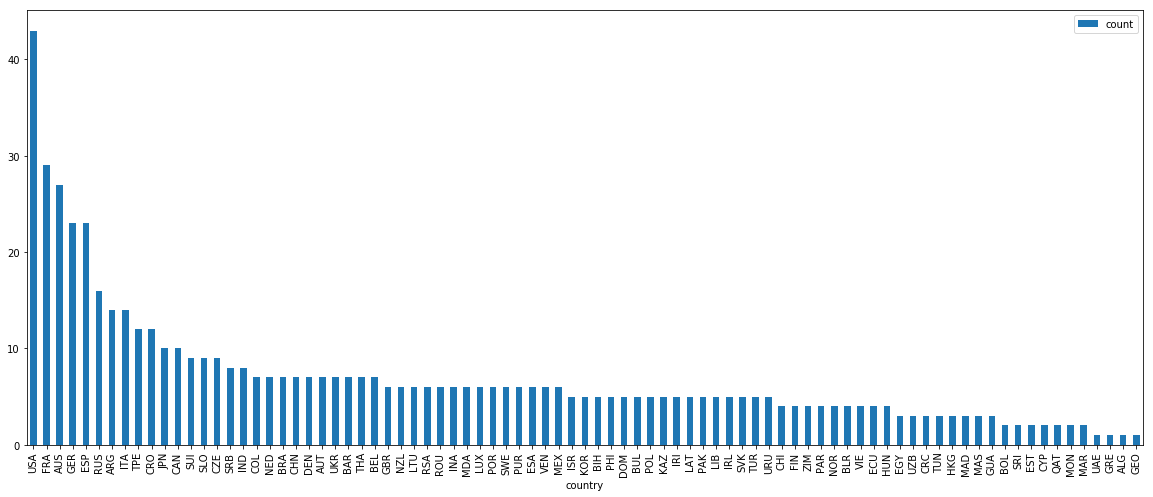

In [963]:
f1.plot(kind='bar', x='country', figsize=(20,8))
plt.show()

# Using Random Forest 

In [964]:
train_df1=dfa.sample(frac=0.8,random_state=50)            #Training Data
test_df1=dfa.drop(train_df1.index)                         #Testing Data

Xdt_train1=train_df1.iloc[:,0:11]
Ydt_train1=train_df1['winner_name']                   
Xdt_test1=test_df1.iloc[:,0:11]
Ydt_test1=test_df1['winner_name']

In [965]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=500)         #Modelling based on Random Forest Algorithm
clf.fit(Xdt_train1, Ydt_train1)
predicted = clf.predict(Xdt_test1)                    #Predictions stored in variable named predicted
   
print("Accuracy Score for Test Data:",accuracy_score(Ydt_test1,predicted))
print("Precision Score for Test Data: ", (precision_score(Ydt_test1,predicted,average='macro' )))
print("Recall Score for Test Data: ", (recall_score(Ydt_test1,predicted,average='macro' )))
print("F1 Score for Test Data: ", (f1_score(Ydt_test1,predicted, average='macro' )))

('Accuracy Score for Test Data:', 0.95588235294117652)
('Precision Score for Test Data: ', 0.71856742697078835)
('Recall Score for Test Data: ', 0.72724089635854339)
('F1 Score for Test Data: ', 0.71994384798453803)


In [966]:
results_dt = clf.predict(Xdt_test1)
print("\n" + str(Counter(results_dt)))


Counter({1: 28, 3: 25, 27: 23, 6: 22, 8: 22, 10: 21, 0: 20, 11: 20, 4: 19, 5: 18, 9: 18, 21: 18, 12: 17, 2: 16, 13: 16, 14: 16, 15: 16, 17: 16, 22: 16, 19: 15, 29: 15, 20: 14, 18: 13, 23: 12, 24: 12, 25: 12, 28: 12, 34: 12, 7: 11, 16: 11, 30: 11, 32: 11, 36: 11, 53: 11, 26: 10, 31: 10, 35: 10, 38: 10, 40: 10, 51: 10, 37: 9, 43: 9, 45: 9, 52: 9, 55: 9, 39: 8, 41: 8, 46: 8, 49: 8, 50: 8, 74: 8, 89: 8, 33: 7, 48: 7, 59: 7, 65: 7, 136: 7, 42: 6, 54: 6, 56: 6, 62: 6, 63: 6, 64: 6, 75: 6, 44: 5, 47: 5, 58: 5, 70: 5, 73: 5, 76: 5, 77: 5, 80: 5, 82: 5, 83: 5, 95: 5, 100: 5, 109: 5, 61: 4, 79: 4, 81: 4, 85: 4, 87: 4, 88: 4, 90: 4, 91: 4, 93: 4, 96: 4, 102: 4, 111: 4, 129: 4, 132: 4, 151: 4, 60: 3, 66: 3, 67: 3, 68: 3, 69: 3, 94: 3, 98: 3, 99: 3, 106: 3, 108: 3, 112: 3, 114: 3, 125: 3, 133: 3, 134: 3, 137: 3, 154: 3, 57: 2, 72: 2, 84: 2, 86: 2, 92: 2, 97: 2, 101: 2, 104: 2, 105: 2, 110: 2, 115: 2, 118: 2, 119: 2, 122: 2, 123: 2, 127: 2, 131: 2, 138: 2, 149: 2, 153: 2, 155: 2, 156: 2, 162: 2, 16

In [967]:
df_a = df_ar['winner_name'].value_counts().dropna().reset_index()
df_a.columns = ['col', 'count']
df_a=df_a.fillna(df_a.median())
df_a.head(11)

,col,count
0,Novak Djokovic,123
1,Andy Murray,104
2,Roberto Bautista Agut,102
3,David Goffin,100
4,Grigor Dimitrov,99
5,Roger Federer,95
6,Rafael Nadal,92
7,Kei Nishikori,91
8,Tomas Berdych,89
9,Stanislas Wawrinka,87
